# Description of the project

The network of fitness centers "Bodybuilder-datacenter" develops a strategy for interacting with customers based on analytical data.
Your task is to conduct an analysis and prepare an action plan for customer retention.
Namely,
to learn how to predict the probability of outflow (at the level of the next month) for each client;
create typical portraits of clients: identify several of the most striking groups and characterize their main properties;
to analyze the main signs that most strongly affect the outflow;
to formulate the main conclusions and develop recommendations for improving the quality of customer service:
1) identify target groups of customers;<br>
2) propose measures to reduce outflow;<br>
3) identify other features of customer interaction.<br>

In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# %pip install seaborn==0.11.0

In [3]:
# Read
df = pd.read_csv('gym_churn.csv', index_col=0)

In [4]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# checking for empty values
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
# checking for duplicates
df.duplicated().sum()

0

In [7]:
# first 5 rows
df.head(5)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

### Summary

The original database contains information about 4,000 records of people in the network of fitness centers "Bodybuilder-datasaentist", which contains information about the field, phone number, number of visits, etc., as well as whether a person stopped his visits in the current month. There are no missing values in the original dataframe. There are also no duplicates. You can start a research analysis of the data.

# Exploratory Data Analysis (EDA)

In [8]:
# we will display descriptive information on all the signs
df.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

There are no missing signs in the dataset. According to this table, it can be said that according to the gender composition that visits this network, approximately the same percentage are both women and men. The variation in the period of the service agreement is interesting, since on average people visit the hall for about 4.5 months, but there is a fairly large sample that visits the hall for more than 5 months. It can also be noted that 75% of visitors spend up to 210.95 USD on third-party fitness center services, with an average value of 146.95 USD for all users. According to all records, it can be found that 26% of all those involved in fitness have left this month. </br>
The variables have quite different standard deviations in magnitude. This suggests that they need to be standardized before training. This is not necessary for logistic regression and the tree, but in general it is already such an out-of-the-box rule. It is better to standardize everything at once, and then drive the models. It is worth pointing out this nuance in the output.

In [9]:
# let's group the data by the churn column
df_churn = df.groupby('Churn').agg('mean')
df_churn.head()

gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.027882  
1                               1.044546

In [10]:
# display the number of people who left and those who remained
df['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

We observe that 1061 people left the fitness center this month. At the same time, it can be observed when grouping by the Churn column that the average values for all our characteristics among the deceased are lower, i.e. they spend less on related services, they have a lower frequency of visits, they have less time left on their contract, they have visited less since the beginning of their visit, they are younger, etc. We can see this in the bar chart below.

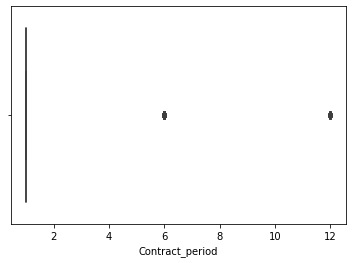

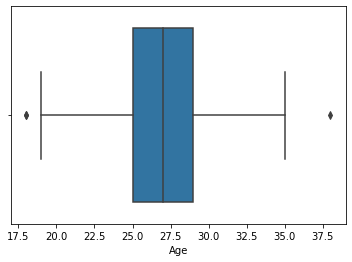

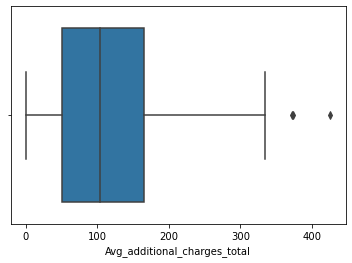

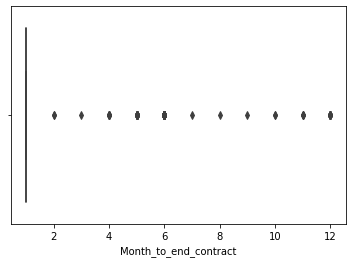

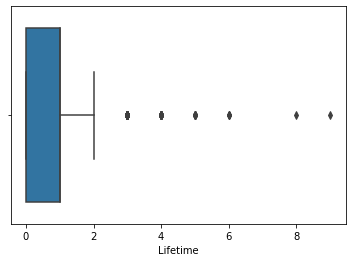

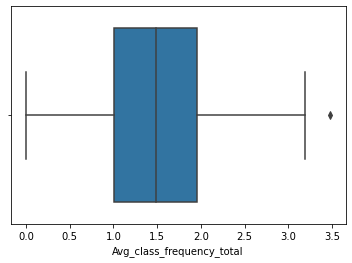

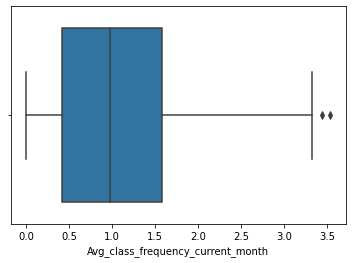

In [11]:
disc_var = ['gender', 'Near_Location', 'Partner', 'Phone', 'Group_visits']
cont_var = ['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
df_churn_1 = df.query('Churn == 1')
df_churn_0 = df.query('Churn == 0')

for feature in cont_var:
    sns.boxplot(x=df_churn_1[feature])
    plt.show() 

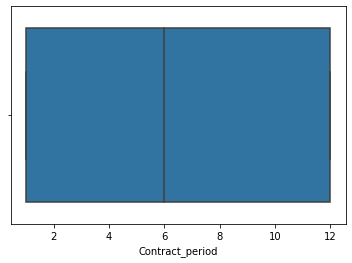

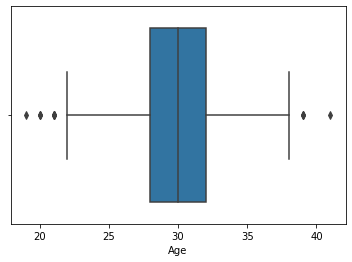

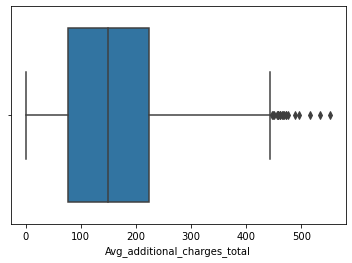

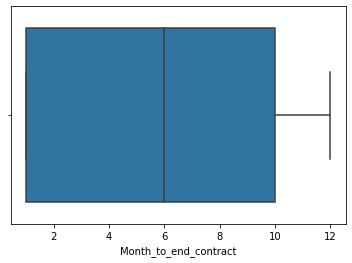

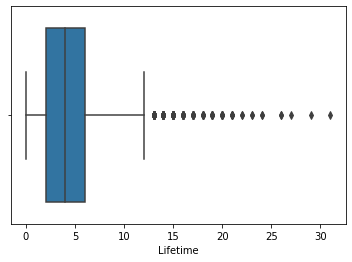

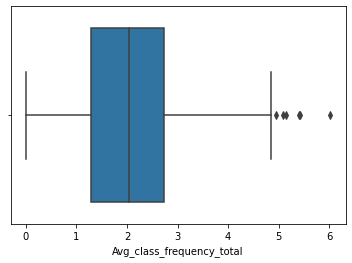

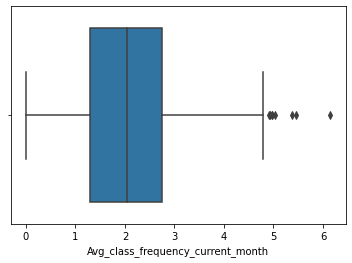

In [12]:
for feature in cont_var:
    sns.boxplot(x=df_churn_0[feature])
    plt.show() 

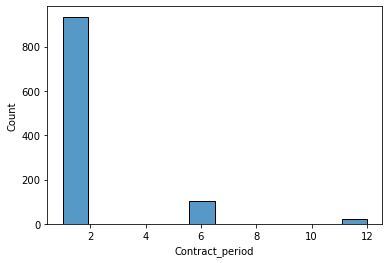

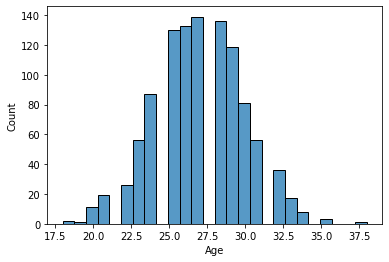

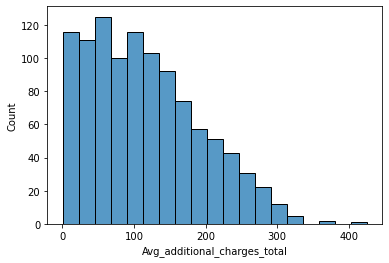

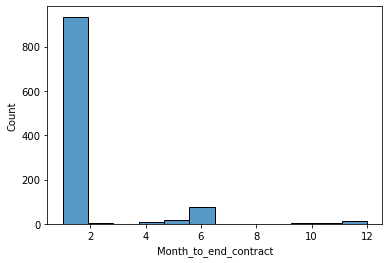

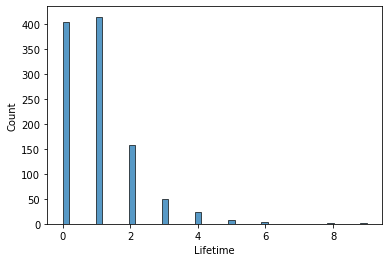

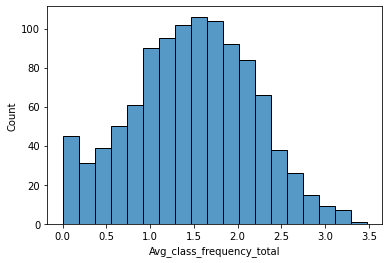

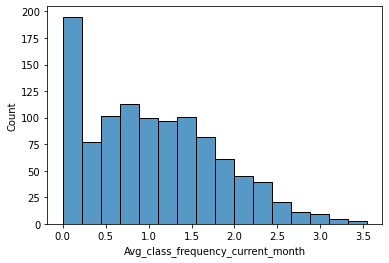

In [13]:
for feature in cont_var:
    sns.histplot(data=df_churn_1, x=feature)
    plt.show()

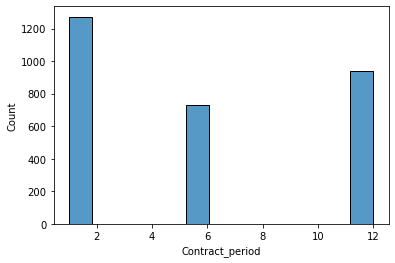

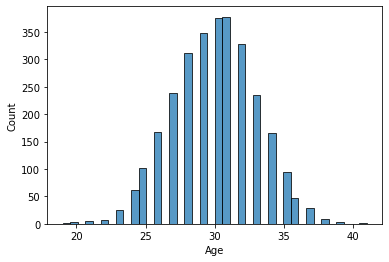

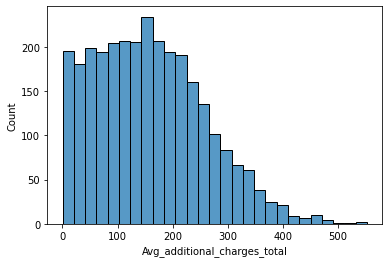

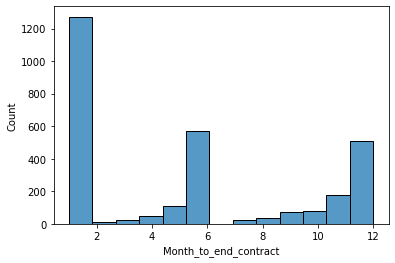

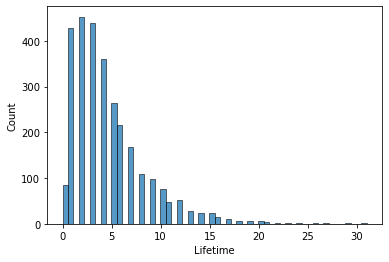

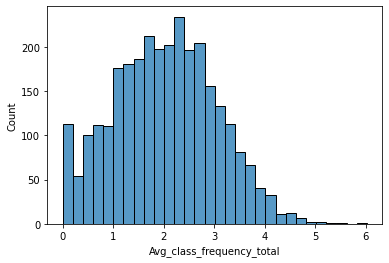

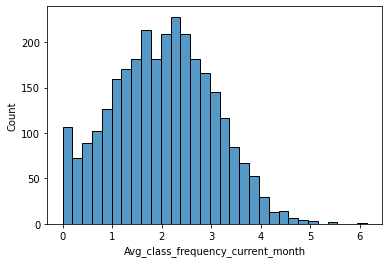

In [14]:
for feature in cont_var:
    sns.histplot(data=df_churn_0, x=feature)
    plt.show()

In [15]:
# build a correlation matrix
cm = df.corr()
cm

gender  Near_Location   Partner  \
gender                             1.000000       0.006699 -0.010463   
Near_Location                      0.006699       1.000000 -0.005119   
Partner                           -0.010463      -0.005119  1.000000   
Promo_friends                     -0.005033       0.210964  0.451960   
Phone                             -0.008542      -0.015763  0.009970   
Contract_period                    0.000502       0.150233  0.306166   
Group_visits                       0.017879       0.154728  0.022710   
Age                                0.013807       0.058358  0.047480   
Avg_additional_charges_total      -0.009334       0.040761  0.022941   
Month_to_end_contract             -0.001281       0.143961  0.294632   
Lifetime                           0.013579       0.070921  0.061229   
Avg_class_frequency_total          0.014620       0.043127  0.024938   
Avg_class_frequency_current_month  0.009156       0.062664  0.045561   
Churn                              0.000708      -0.128098 -0.157986   

                                   Promo_friends     Phone  Contract_period  \
gender                                 -0.005033 -0.008542         0.000502   
Near_Location                           0.210964 -0.015763         0.150233   
Partner                                 0.451960  0.009970         0.306166   
Promo_friends                           1.000000  0.001982         0.244552   
Phone                                   0.001982  1.000000        -0.006893   
Contract_period                         0.244552 -0.006893         1.000000   
Group_visits                            0.120170 -0.010099         0.169991   
Age                                     0.050113 -0.011403         0.138249   
Avg_additional_charges_total            0.036898  0.009279         0.111445   
Month_to_end_contract                   0.239553 -0.011196         0.973064   
Lifetime                                0.072721 -0.018801         0.170725   
Avg_class_frequency_total               0.028063  0.008340         0.096211   
Avg_class_frequency_current_month       0.053768  0.013375         0.159407   
Churn                                  -0.162233 -0.001177        -0.389984   

                                   Group_visits       Age  \
gender                                 0.017879  0.013807   
Near_Location                          0.154728  0.058358   
Partner                                0.022710  0.047480   
Promo_friends                          0.120170  0.050113   
Phone                                 -0.010099 -0.011403   
Contract_period                        0.169991  0.138249   
Group_visits                           1.000000  0.080934   
Age                                    0.080934  1.000000   
Avg_additional_charges_total           0.032079  0.080240   
Month_to_end_contract                  0.163703  0.134511   
Lifetime                               0.075853  0.164693   
Avg_class_frequency_total              0.056695  0.119953   
Avg_class_frequency_current_month      0.075923  0.183095   
Churn                                 -0.175325 -0.404735   

                                   Avg_additional_charges_total  \
gender                                                -0.009334   
Near_Location                                          0.040761   
Partner                                                0.022941   
Promo_friends                                          0.036898   
Phone                                                  0.009279   
Contract_period                                        0.111445   
Group_visits                                           0.032079   
Age                                                    0.080240   
Avg_additional_charges_total                           1.000000   
Month_to_end_contract                                  0.113958   
Lifetime                                               0.079028   
Avg_class_frequency_total                         

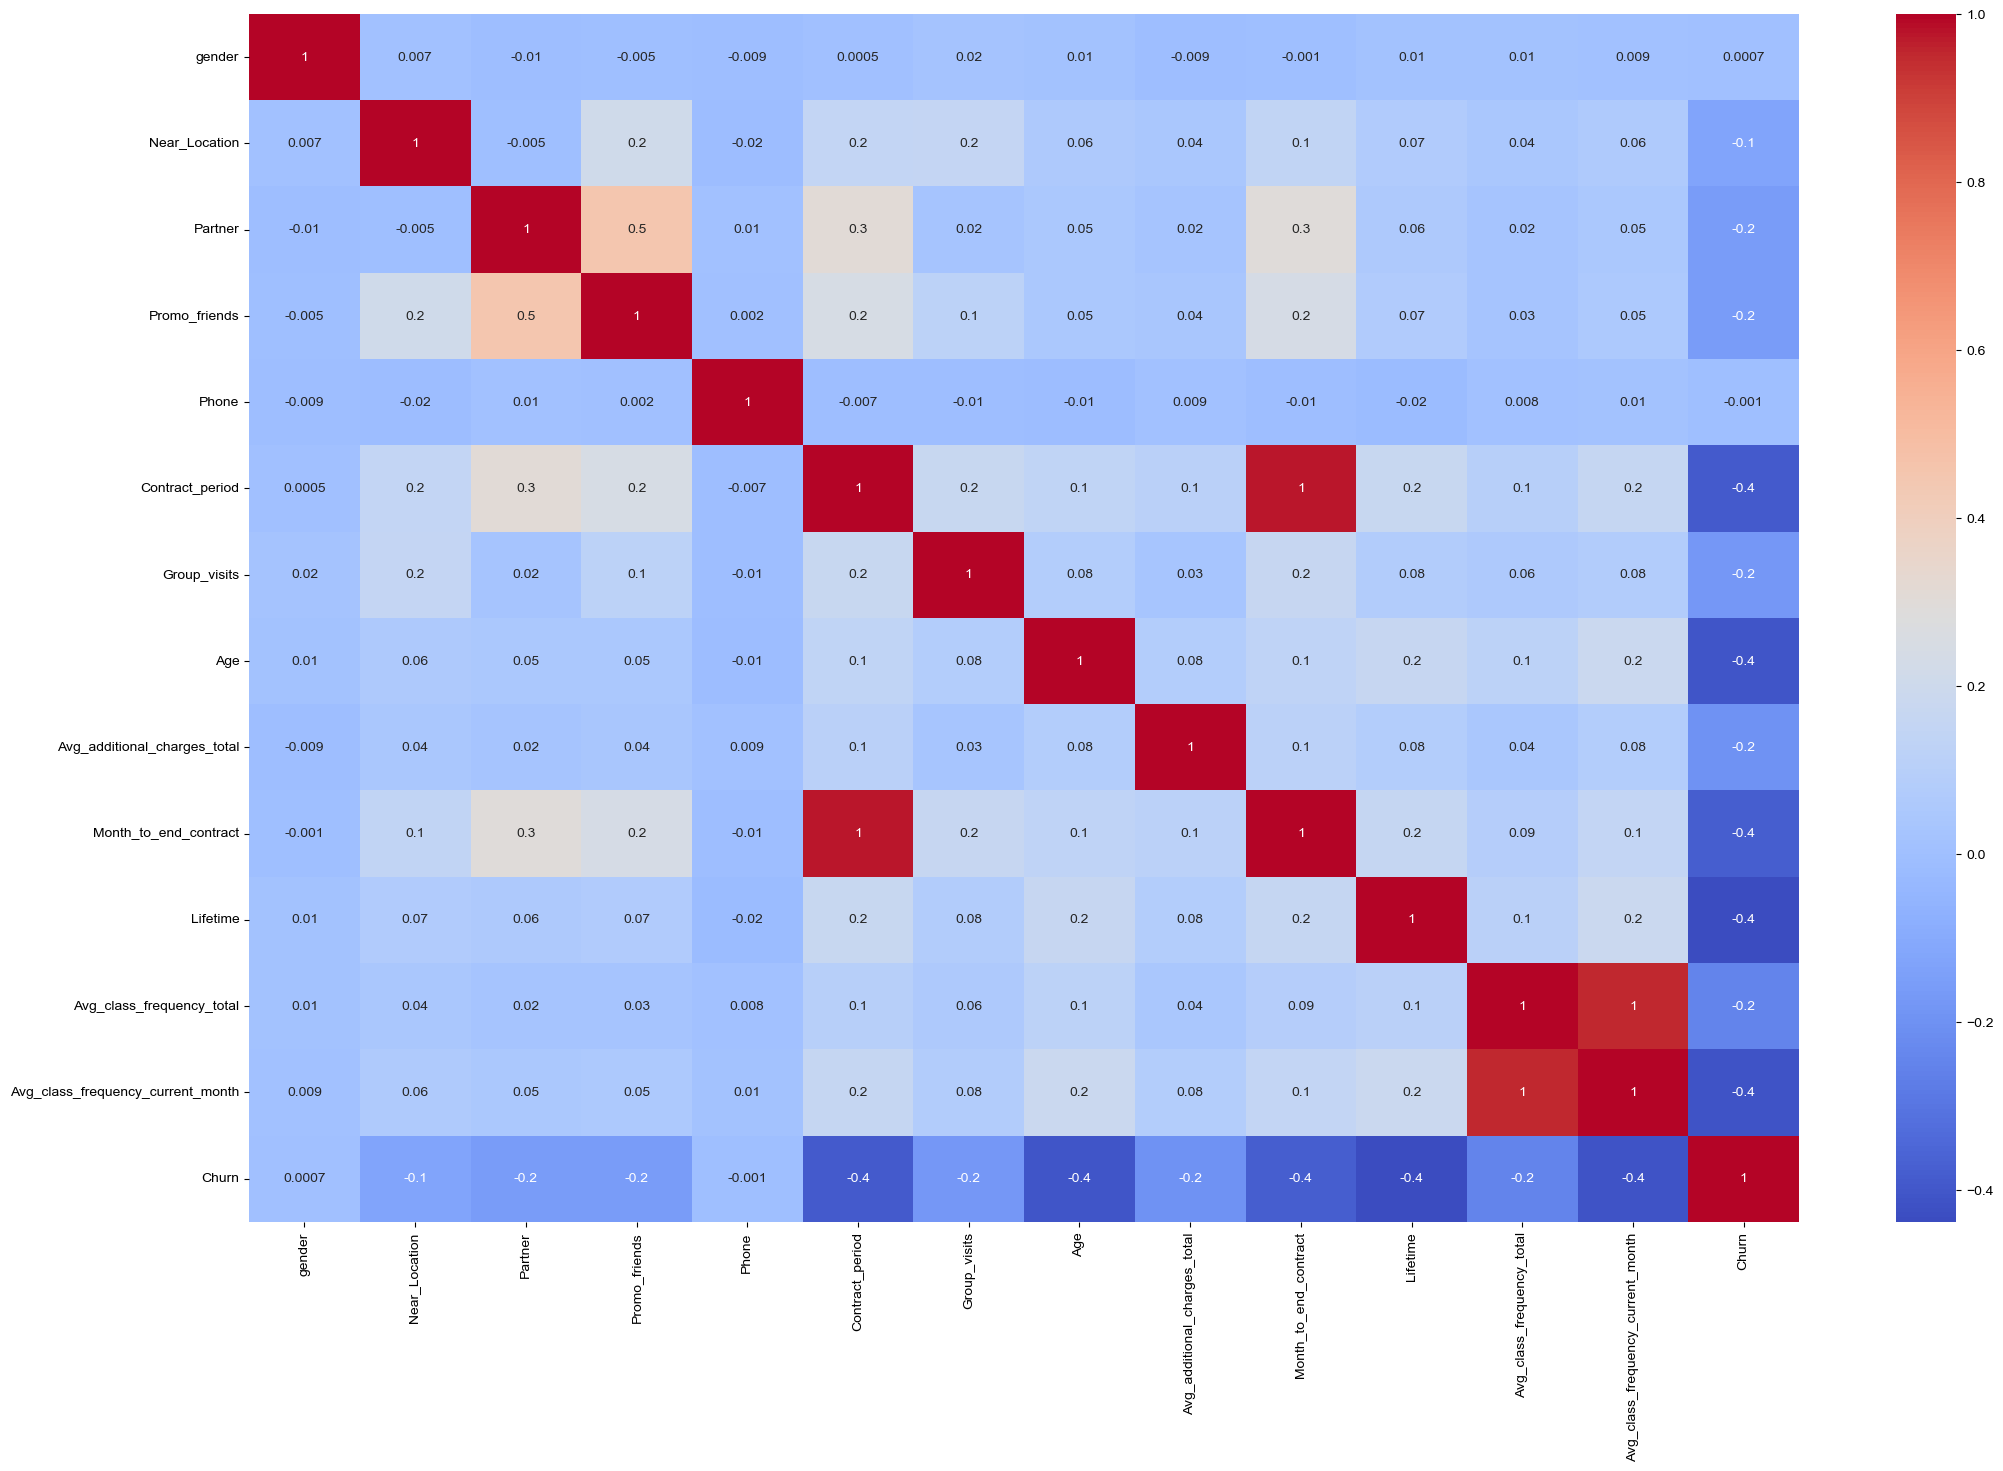

In [16]:
fig=plt.figure(figsize=(25, 16), dpi= 100)
sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')
sns.set(font_scale=2.2)

### Summary

The factors/signs that most influence whether a person stays or leaves are - according to the correlation matrix:
1) used a promo code from a friend when paying for the first subscription and whether the company is a partner (average influence);<br>
2) the duration of the current contract and the period until the end of the contract (strong influence);<br>
3) average frequency of visits since the beginning of the subscription and for the previous month (strong influence).

# Customer churn forecasting model

You can use the stratify = y parameter in the train_test_split() function, where y is the corresponding target variable. The data will be divided into two clusters (observations of class 0 and observations of class 1), and 20% of observations from each cluster will be included in the validation sample:

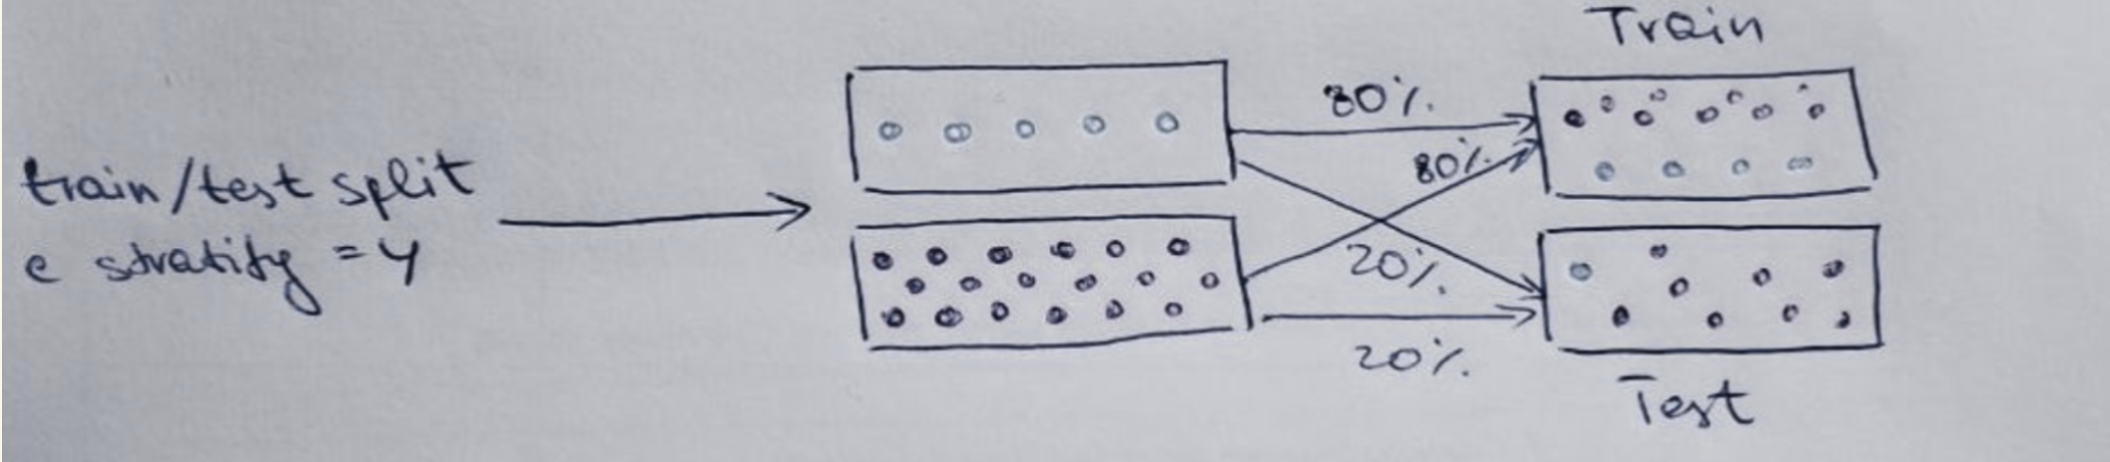
    
That is, if the class ratio in the original sample was 2:5, then in the training and validation samples it will remain the same. This approach somewhat solves the problem of unbalanced classes.

The train_test_split( ) function is designed so that we do not encounter such a problem.

In [17]:
# divide the data into features (matrix X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']
# divide the model into a training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)
def print_all_metrics(y_true, y_pred, y_proba, title='Classification Metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))

print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Metrics for the logistic regression model:',
)

Metrics for the logistic regression model:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83
	F1: 0.85


In [18]:
# let's set an algorithm for the new model based on the random forest algorithm
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
# train a random forest model
rf_model.fit(X_train, y_train)
# Let's use the already trained model to make predictions
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)
print_all_metrics(
    y_test,
    rf_predictions, 
    rf_probabilities,
    title='Metrics for the random forest model:'
)

Metrics for the random forest model:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83


### Summary

The logistic regression model is the most suitable, since the Accuracy, Precision, Recall, F1 indicators are higher relative to the random forest model.<br>
The accuracy metric is 93%, which is a high indicator, meaning a high proportion of correct objects. But it is impossible to evaluate the model using this metric, since we do not maintain class balance - that is, the shares of those who left and those who remained are not equal to 50%.<br>
The values of the Precision and Recall metrics are 0.86 and 0.83, respectively, which means a high proportion (86%) of correct answers only among the target class, and also that with a probability of 83% we correctly detected real objects of the class. The Recall metric takes a rather low indicator, since it shows what proportion of objects of a positive class out of all objects of a positive class the algorithm found. The F1 metric, which has a high indicator of 85%, is designed to balance the indicators.<br>
We accept that indicators from 0.8 are high, since we have few characteristics on which we build the model and an insufficient number of observations (4000).

# Clustering clients

The variable churn had to be excluded from the data before standardization, this is indicated in the assignment.
 
Let's imagine that we have a sample of fruits with different characteristics (shape, color, presence of leaves, spots, etc.). We tried to build a classification model to predict the color of a fruit (green or pink). We then decided to remove color from the data and see if fruit could be separated by other characteristics so that we could identify clusters that were most likely to be green, for example.
    
Below is an example, understandable on an intuitive level, of how the division into groups without and with a color variable would occur.
    
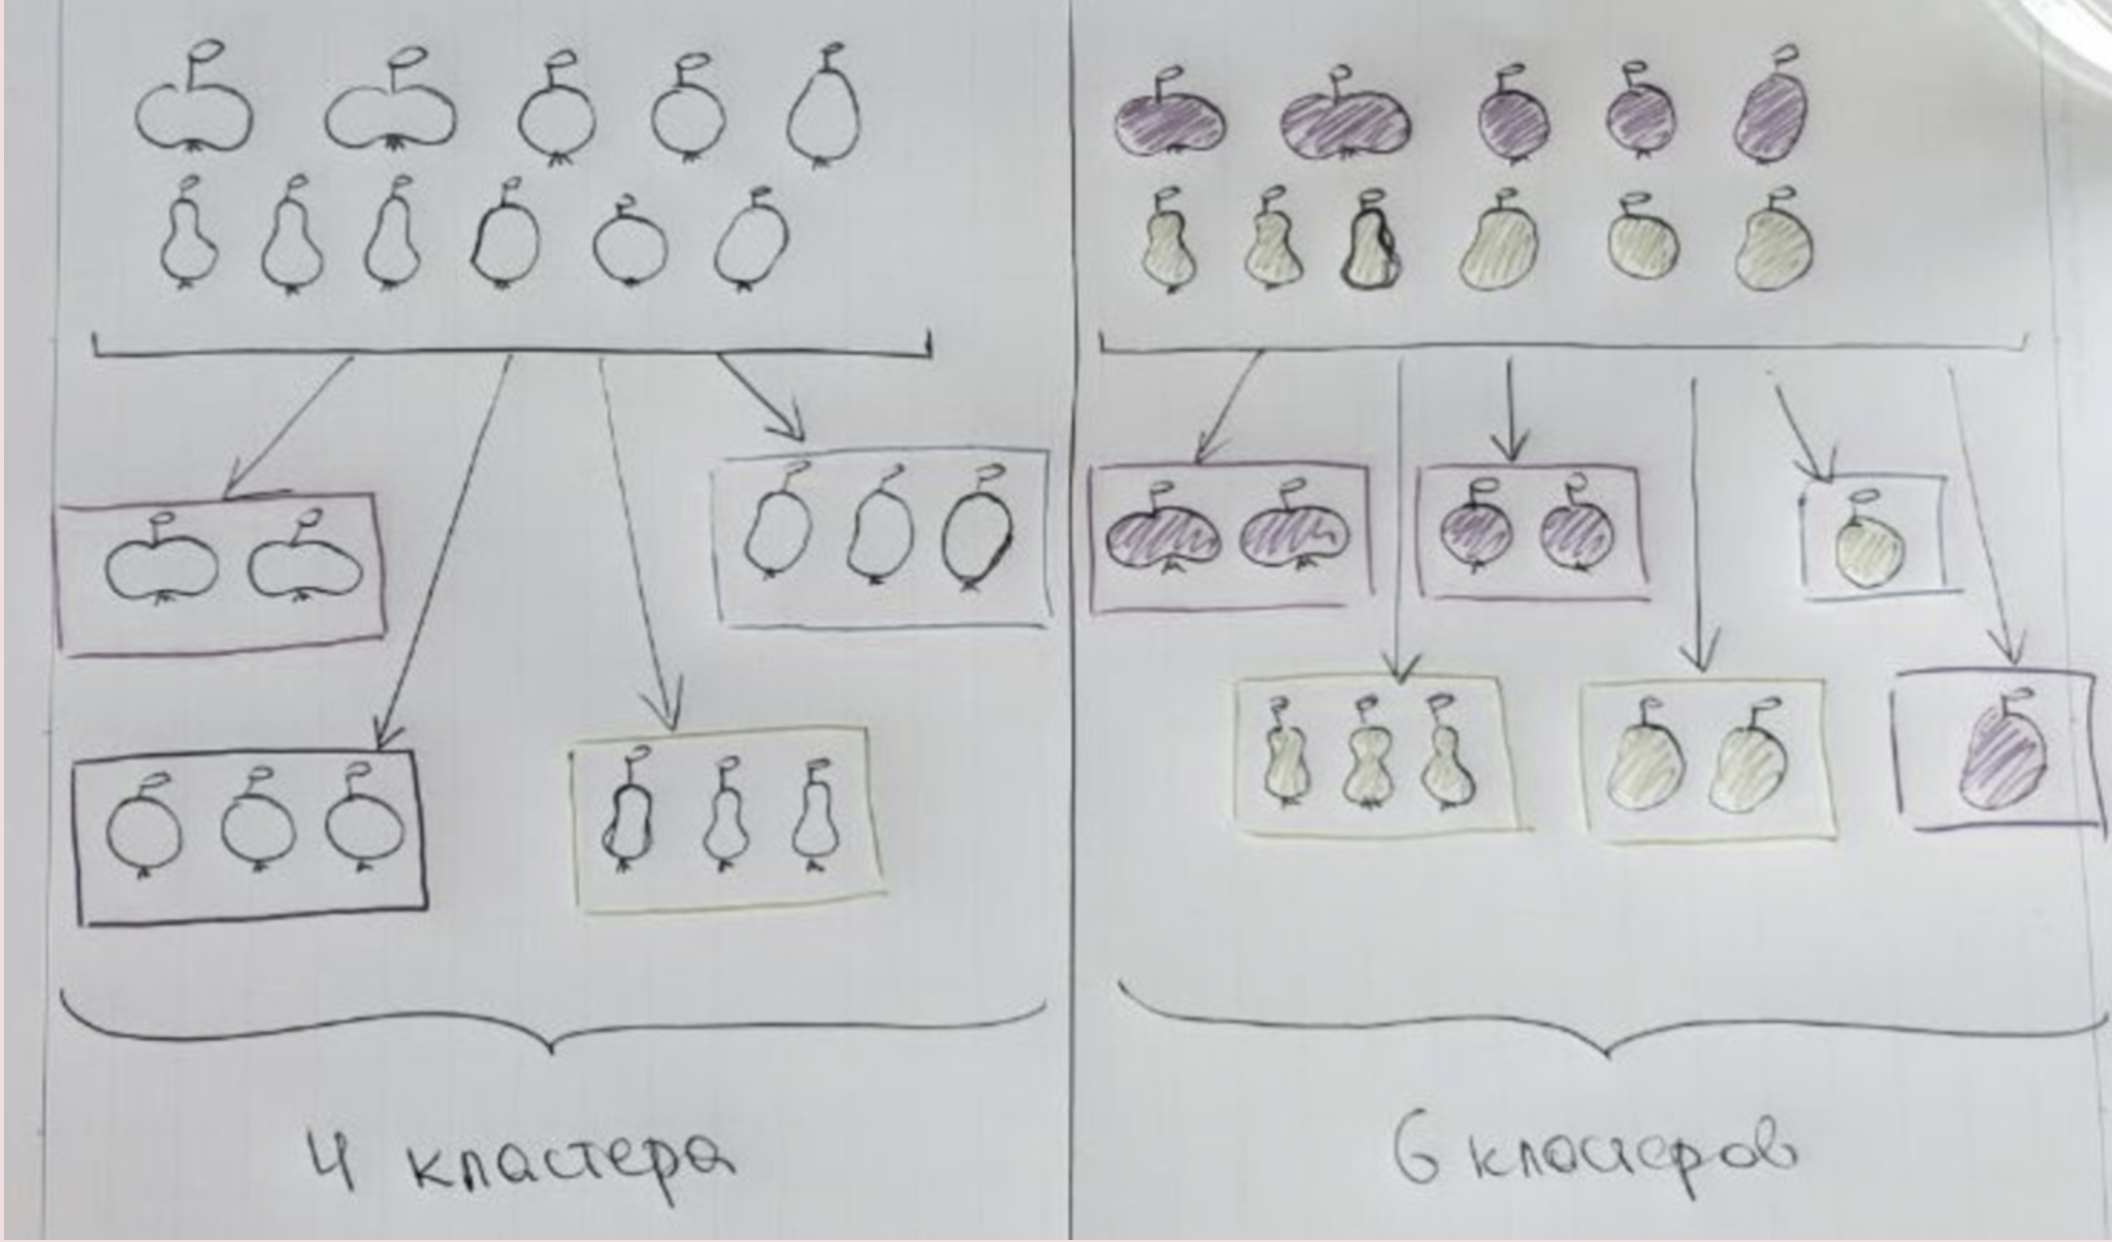
    
When adding the churn variable, the same situation occurs. Data becomes more separable due to additional information. But such clustering does not make sense, since we will get one cluster with a very high churn, and all the rest with insignificant ones. Our goal is simply to understand what customer groups are in the club, and then analyze these groups for their tendency to churn.

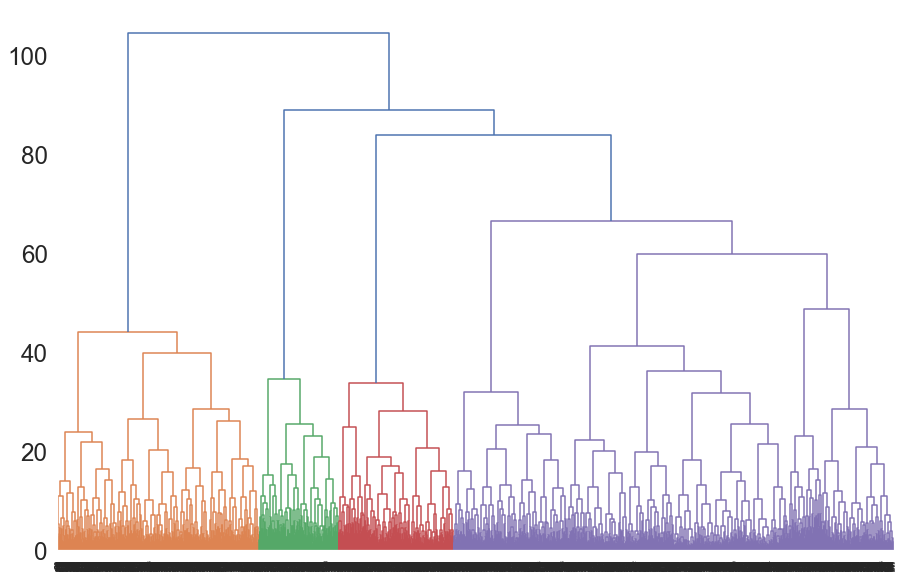

In [19]:
# mandatory standardization of data before working with algorithms
df_new = df.drop('Churn', axis=1)
sc = StandardScaler()
X_sc = sc.fit_transform(df_new)

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

The graph shows that we have formed 4 clusters.

In [20]:
# set the k_means model with the number of clusters 5
km = KMeans(n_clusters=5, random_state=0)
# predict clusters for observations (the algorithm assigns them numbers from 0 to 4)
labels = km.fit_predict(X_sc)

# save the cluster labels in the field of our dataset
df_new['cluster_km'] = labels

# display statistics on the average values of our features for the cluster
df_new.groupby('cluster_km').mean()

gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.502970       0.959406  0.783168       0.574257  1.000000   
1           0.522078       0.862338  0.470130       0.306494  0.000000   
2           0.495050       0.000000  0.463366       0.079208  1.000000   
3           0.485737       1.000000  0.350238       0.240095  1.000000   
4           0.559666       0.976134  0.356802       0.230310  0.998807   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                 10.889109      0.542574  29.982178   
1                  4.787013      0.425974  29.301299   
2                  2.352475      0.215842  28.477228   
3                  1.948494      0.341521  28.167987   
4                  2.669451      0.473747  30.125298   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km                                                                  
0                             160.761016               9.954455  4.736634   
1                             143.957664               4.475325  3.924675   
2                             135.457501               2.198020  2.809901   
3                             131.622204               1.856577  2.440571   
4                             161.657905               2.459427  4.898568   

            Avg_class_frequency_total  Avg_class_frequency_current_month  
cluster_km                                                                
0                            1.982055                           1.974789  
1                            1.847220                           1.716369  
2                            1.660461                           1.477324  
3                            1.247634                           1.012983  
4                            2.852002                           2.850161

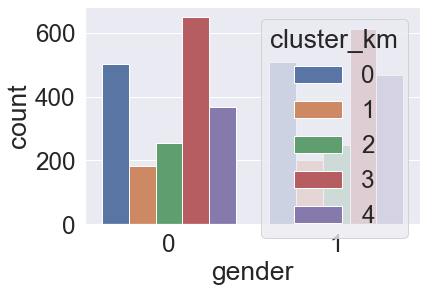

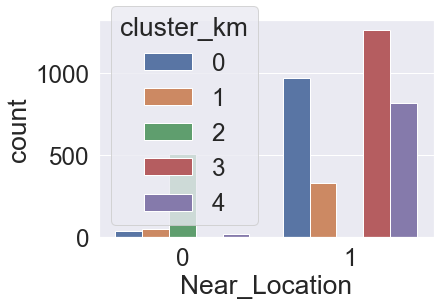

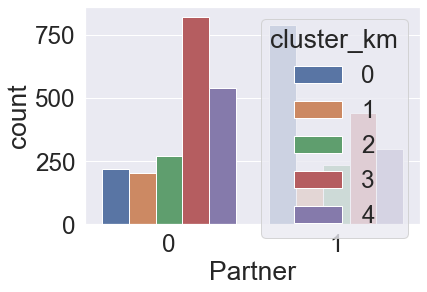

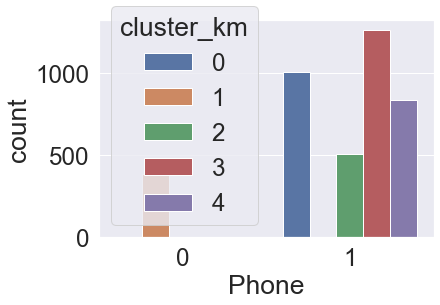

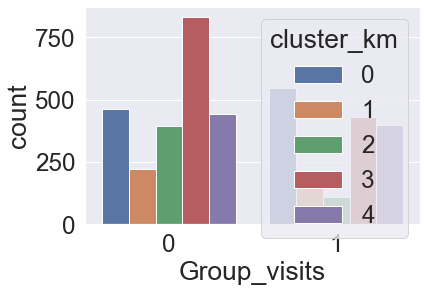

In [21]:
for feature in disc_var:
    sns.countplot(data = df_new, x = feature, hue = 'cluster_km')
    plt.show()

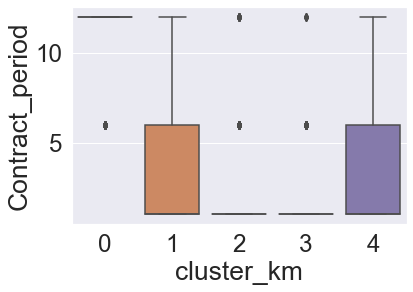

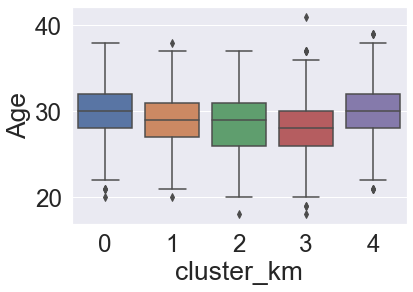

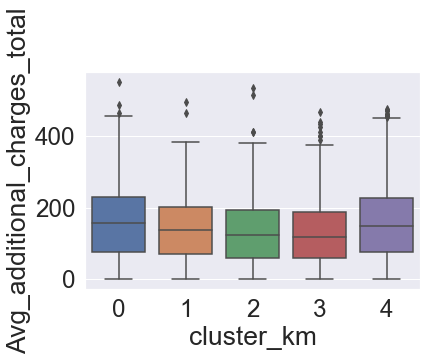

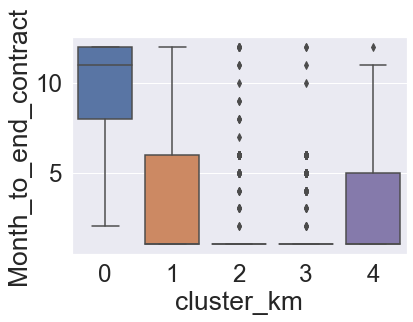

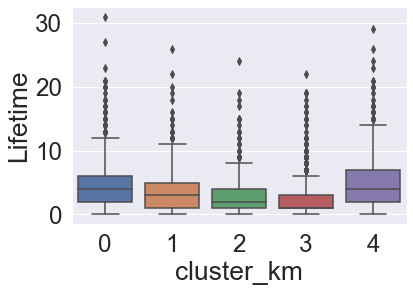

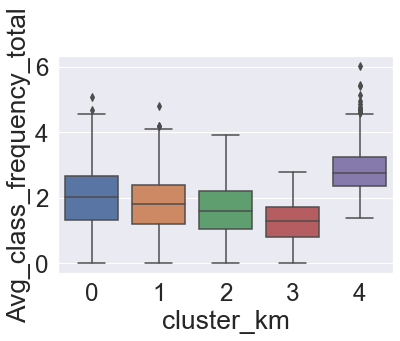

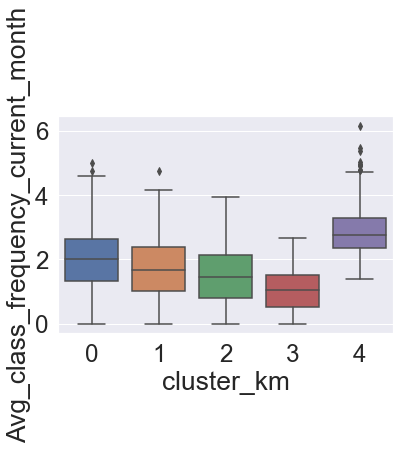

In [22]:
for feature in cont_var:
    sns.boxplot(x ='cluster_km',y = feature, data = df_new)
    plt.show()

The graphs show that the indicators of those who left and those who stayed are different. Those who left and are more loyal to this network of fitness centers have higher indicators in almost all respects. Including the features that, in my opinion, are fundamentally important - Contract_period, Avg_class_frequency_total, Avg_class_frequency_current_month, Avg_additional_charges_total. <br>
<br>
The clusters with the highest indicators for important characteristics are

In [23]:
df['cluster_km'] = labels
df.groupby('cluster_km').mean()

gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.502970       0.959406  0.783168       0.574257  1.000000   
1           0.522078       0.862338  0.470130       0.306494  0.000000   
2           0.495050       0.000000  0.463366       0.079208  1.000000   
3           0.485737       1.000000  0.350238       0.240095  1.000000   
4           0.559666       0.976134  0.356802       0.230310  0.998807   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                 10.889109      0.542574  29.982178   
1                  4.787013      0.425974  29.301299   
2                  2.352475      0.215842  28.477228   
3                  1.948494      0.341521  28.167987   
4                  2.669451      0.473747  30.125298   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km                                                                  
0                             160.761016               9.954455  4.736634   
1                             143.957664               4.475325  3.924675   
2                             135.457501               2.198020  2.809901   
3                             131.622204               1.856577  2.440571   
4                             161.657905               2.459427  4.898568   

            Avg_class_frequency_total  Avg_class_frequency_current_month  \
cluster_km                                                                 
0                            1.982055                           1.974789   
1                            1.847220                           1.716369   
2                            1.660461                           1.477324   
3                            1.247634                           1.012983   
4                            2.852002                           2.850161   

               Churn  
cluster_km            
0           0.027723  
1           0.267532  
2           0.443564  
3           0.514263  
4           0.068019

### Summary 

According to the table, it can be seen that 5 clusters have formed. A distinctive feature is that cluster 1 and 4, despite the fact that all users live in this area with a network of fitness centers, with an indicator of 2% and 51% stopped exercising in the current month.<br>
The pattern is that clusters 3 and 4 are the clusters with the largest number of user churn and these clusters have the lowest Avg_additional_charges_total, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month indicators. The explanation may be that the service and services associated with training on the simulator did not meet the expectations of these users, so they left.

# Summary

1) Increase the level of service associated with sports activities (bath, sauna, phone chargers, cryosaunas, massage, recreation areas, cafes, parking, etc.);<br>
2) Focus on interaction with partner companies, since the majority of people remaining in the network of fitness centers fall into this category;<br>
3) For loyal customers with a long contract or subscription period, make promotions and discounts, since people who are not from the outflow have a higher contract length;<br>
4) It is also worth paying attention to the category of people who came through the “Refer a Friend” program; they are more loyal to your network.<br>